In [1]:
import pandas as pd

# make own headers because the CSV has none
col_names = ["buying","maintenance","doors","persons","trunk","safety","class"]

csv_path = "./Data/car.data"
df = pd.read_csv(csv_path, header=None, names=col_names)

df

,buying,maintenance,doors,persons,trunk,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
from sklearn.preprocessing import OrdinalEncoder

# define the order of categorical data in ascending order
categorical_orders = {
    'buying':['low', 'med', 'high', 'vhigh'],
    'maintenance':['low', 'med', 'high', 'vhigh'],
    'doors':['2', '3', '4', '5more'],
    'persons':['2', '4', 'more'],
    'trunk':['small', 'med', 'big'],
    'safety':['low', 'med', 'high'],
    'class':['unacc', 'acc', 'good', 'vgood']
}

# datatype assertion
for column in categorical_orders.keys():
    df[column] = df[column].astype(str)

#
for column, order in categorical_orders.items():
    # reshape to 2D array bc OrdinalEncoder expects such
    column_data = df[column].values.reshape(-1, 1)

    # encoder instance using category order
    encoder = OrdinalEncoder(categories=[order])

    # fit the data
    encoded_data = encoder.fit_transform(column_data)

    # replace original column with encoded one
    df[column] = encoded_data.ravel()

df

,buying,maintenance,doors,persons,trunk,safety,class
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1723,0.0,0.0,3.0,2.0,1.0,1.0,2.0
1724,0.0,0.0,3.0,2.0,1.0,2.0,3.0
1725,0.0,0.0,3.0,2.0,2.0,0.0,0.0
1726,0.0,0.0,3.0,2.0,2.0,1.0,2.0


In [3]:
# define features (independent variable)
X = df.drop('class', axis=1)

# define targets (dependent variable)
y = df['class']

print(f"Features:\n{X}\n")
print(f"Target:\n{y}")

Features:
      buying  maintenance  doors  persons  trunk  safety
0        3.0          3.0    0.0      0.0    0.0     0.0
1        3.0          3.0    0.0      0.0    0.0     1.0
2        3.0          3.0    0.0      0.0    0.0     2.0
3        3.0          3.0    0.0      0.0    1.0     0.0
4        3.0          3.0    0.0      0.0    1.0     1.0
...      ...          ...    ...      ...    ...     ...
1723     0.0          0.0    3.0      2.0    1.0     1.0
1724     0.0          0.0    3.0      2.0    1.0     2.0
1725     0.0          0.0    3.0      2.0    2.0     0.0
1726     0.0          0.0    3.0      2.0    2.0     1.0
1727     0.0          0.0    3.0      2.0    2.0     2.0

[1728 rows x 6 columns]

Target:
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1723    2.0
1724    3.0
1725    0.0
1726    2.0
1727    3.0
Name: class, Length: 1728, dtype: float64


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=450, random_state=7)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model for future use
from joblib import dump
dump(rf_model, 'rf_car_eval.joblib')

[[481   1   0   0]
 [  1 151   1   1]
 [  0   0  20   3]
 [  0   1   0  32]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       482
         1.0       0.99      0.98      0.98       154
         2.0       0.95      0.87      0.91        23
         3.0       0.89      0.97      0.93        33

    accuracy                           0.99       692
   macro avg       0.96      0.95      0.95       692
weighted avg       0.99      0.99      0.99       692



['rf_car_eval.joblib']

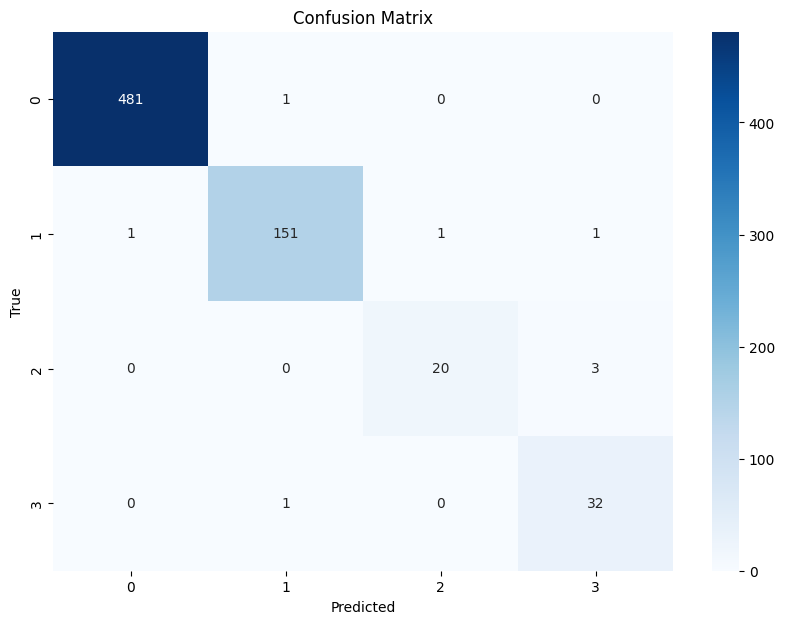

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# calc confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
to_predict = [[1, 1, 1, 1, 1, 1]]
rf_model.predict(to_predict)

/home/naufalghifari/PythonEnvs/DataScience-ML/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])